In [1]:
import numpy as np
import pymc as pm
import pandas as pd
import arviz as az
from pymc.math import dot, invlogit
import pytensor.tensor as pt
import math
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

os.chdir("C:/Users/466131/Documents/Baye")

data = pd.read_csv("MMAProject.csv", index_col=0)
X = data[["SA","SD","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()

# y = np.reshape(y, (-1, 1))

print(X.shape)
print(y.shape)
n=26

(29, 5)
(29,)


In [2]:
#removing strike defense

os.chdir("C:/Users/466131/Documents/Baye")

data = pd.read_csv("MMAProject.csv", index_col=0)
X = data[["SA","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()


with pm.Model() as m2:
    if __name__ == '__main__':

        X_data = pm.Data("X_data", X, mutable=True)
        y_data = pm.Data("y_data", y, mutable=True)

        alpha = pm.Normal("alpha", mu=0, sigma=10)
        betas = pm.Normal("beta", mu=0, sigma=5, shape=X.shape[1])

        p = invlogit(alpha + dot(X_data, betas))

        pm.Binomial("y",n=26, p=p, observed=y_data)

        trace = pm.sample(1000)
        print(az.summary(trace))
        
        ppc = pm.sample_posterior_predictive(trace,var_names = ['y'])
        yhat=(az.summary(ppc,var_names=['y'])['mean'].values)
        r2 = az.r2_score(y, yhat)
        data = az.convert_to_inference_data(trace)
        idata = pm.compute_log_likelihood(data)
        dev = az.waic(idata,scale="deviance",var_name="y")
        print(dev)
        print(r2)
        print(yhat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 224 seconds.
Sampling: [y]


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -4.328  1.876  -7.845   -0.809      0.052    0.037    1296.0   
beta[0] -0.236  0.094  -0.419   -0.069      0.002    0.001    2013.0   
beta[1]  2.268  0.708   0.999    3.645      0.015    0.011    2204.0   
beta[2]  1.469  0.518   0.526    2.474      0.014    0.010    1309.0   
beta[3]  5.610  1.314   3.170    8.014      0.034    0.024    1483.0   

         ess_tail  r_hat  
alpha      1618.0    1.0  
beta[0]    2298.0    1.0  
beta[1]    2266.0    1.0  
beta[2]    1645.0    1.0  
beta[3]    1943.0    1.0  


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Computed from 4000 posterior samples and 29 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   121.41     9.31
p_waic            5.58        -

There has been a warning during the calculation. Please check the results.
r2        0.566048
r2_std    0.000000
dtype: float64
[25.657 21.189 22.319 23.194 23.352 24.33  22.763 20.57  20.032 19.792
 21.614 22.232 20.786 20.058 23.162 18.488 20.714 21.61  20.388 22.251
 21.062 20.526 22.986 25.871 23.135 25.372 20.109 17.096 19.366]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [3]:
#removing strikes absorbed
os.chdir("C:/Users/466131/Documents/Baye")

data = pd.read_csv("MMAProject.csv", index_col=0)
X = data[["SD","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()


with pm.Model() as m3:
    if __name__ == '__main__':

        X_data = pm.Data("X_data", X, mutable=True)
        y_data = pm.Data("y_data", y, mutable=True)

        alpha = pm.Normal("alpha", mu=0, sigma=10)
        betas = pm.Normal("beta", mu=0, sigma=5, shape=X.shape[1])

        p = invlogit(alpha + dot(X_data, betas))

        pm.Binomial("y",n=26, p=p, observed=y_data)

        trace = pm.sample(1000)
        print(az.summary(trace))
        
        
        ppc = pm.sample_posterior_predictive(trace,var_names = ['y'])
        yhat=(az.summary(ppc,var_names=['y'])['mean'].values)
        r2 = az.r2_score(y, yhat)
        data = az.convert_to_inference_data(trace)
        idata = pm.compute_log_likelihood(data)
        dev = az.waic(idata,scale="deviance",var_name="y")
        print(dev)
        print(r2)
        print(yhat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 213 seconds.
Sampling: [y]


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -6.029  2.188 -10.122   -1.926      0.062    0.044    1268.0   
beta[0]  5.381  2.066   1.473    9.230      0.044    0.032    2170.0   
beta[1]  2.232  0.684   0.979    3.536      0.015    0.011    1967.0   
beta[2]  0.890  0.515  -0.087    1.827      0.014    0.010    1280.0   
beta[3]  5.058  1.339   2.621    7.546      0.035    0.025    1470.0   

         ess_tail  r_hat  
alpha      1608.0    1.0  
beta[0]    2302.0    1.0  
beta[1]    1983.0    1.0  
beta[2]    1756.0    1.0  
beta[3]    2196.0    1.0  


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Computed from 4000 posterior samples and 29 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   119.65    10.37
p_waic            5.69        -

There has been a warning during the calculation. Please check the results.
r2        0.572634
r2_std    0.000000
dtype: float64
[25.796 21.912 22.182 22.439 23.633 24.04  23.064 22.647 21.177 19.852
 19.776 21.273 21.908 20.205 23.581 20.411 20.59  21.93  20.801 18.836
 20.454 20.899 22.718 25.782 21.739 25.58  20.276 18.064 18.507]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [4]:
#removing KO proportion
os.chdir("C:/Users/466131/Documents/Baye")

data = pd.read_csv("MMAProject.csv", index_col=0)
X = data[["SA","SD","SS","GI"]].to_numpy()
y = data["y"].to_numpy()


with pm.Model() as m4:
    if __name__ == '__main__':

        X_data = pm.Data("X_data", X, mutable=True)
        y_data = pm.Data("y_data", y, mutable=True)

        alpha = pm.Normal("alpha", mu=0, sigma=10)
        betas = pm.Normal("beta", mu=0, sigma=5, shape=X.shape[1])

        p = invlogit(alpha + dot(X_data, betas))

        pm.Binomial("y",n=26, p=p, observed=y_data)

        trace = pm.sample(1000)
        print(az.summary(trace))
        
        
        ppc = pm.sample_posterior_predictive(trace,var_names = ['y'])
        yhat=(az.summary(ppc,var_names=['y'])['mean'].values)
        r2 = az.r2_score(y, yhat)
        data = az.convert_to_inference_data(trace)
        idata = pm.compute_log_likelihood(data)
        dev = az.waic(idata,scale="deviance",var_name="y")
        print(dev)
        print(r2)
        print(yhat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 198 seconds.
Sampling: [y]


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -5.136  2.062  -9.082   -1.316      0.055    0.039    1404.0   
beta[0] -0.082  0.091  -0.242    0.106      0.002    0.002    2288.0   
beta[1]  2.728  2.048  -1.110    6.643      0.048    0.034    1817.0   
beta[2]  1.384  0.506   0.405    2.291      0.013    0.009    1474.0   
beta[3]  4.604  1.063   2.560    6.493      0.026    0.018    1746.0   

         ess_tail  r_hat  
alpha      1648.0    1.0  
beta[0]    1990.0    1.0  
beta[1]    1602.0    1.0  
beta[2]    1694.0    1.0  
beta[3]    2068.0    1.0  


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Computed from 4000 posterior samples and 29 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   131.40    12.71
p_waic            6.82        -

There has been a warning during the calculation. Please check the results.
r2        0.419717
r2_std    0.000000
dtype: float64
[25.452 19.002 22.206 21.772 22.473 24.202 22.768 20.094 21.686 21.781
 21.588 21.411 22.445 21.562 23.104 20.175 22.096 21.411 18.944 19.11
 21.93  18.838 22.718 25.51  20.992 25.288 21.173 18.93  21.207]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [5]:
#removing strikes per minute while standing
os.chdir("C:/Users/466131/Documents/Baye")

data = pd.read_csv("MMAProject.csv", index_col=0)
X = data[["SA","SD","KO","GI"]].to_numpy()
y = data["y"].to_numpy()


with pm.Model() as m5:
    if __name__ == '__main__':

        X_data = pm.Data("X_data", X, mutable=True)
        y_data = pm.Data("y_data", y, mutable=True)

        alpha = pm.Normal("alpha", mu=0, sigma=10)
        betas = pm.Normal("beta", mu=0, sigma=5, shape=X.shape[1])

        p = invlogit(alpha + dot(X_data, betas))

        pm.Binomial("y",n=26, p=p, observed=y_data)

        trace = pm.sample(1000)
        print(az.summary(trace))
        
        
        ppc = pm.sample_posterior_predictive(trace,var_names = ['y'])
        yhat=(az.summary(ppc,var_names=['y'])['mean'].values)
        r2 = az.r2_score(y, yhat)
        data = az.convert_to_inference_data(trace)
        idata = pm.compute_log_likelihood(data)
        dev = az.waic(idata,scale="deviance",var_name="y")
        print(dev)
        print(r2)
        print(yhat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 177 seconds.
Sampling: [y]


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -2.373  1.346  -5.070   -0.016      0.033    0.024    1638.0   
beta[0] -0.109  0.094  -0.278    0.069      0.002    0.002    1997.0   
beta[1]  5.334  2.083   1.433    9.251      0.049    0.034    1842.0   
beta[2]  2.694  0.717   1.311    3.982      0.016    0.011    2015.0   
beta[3]  3.254  0.946   1.477    4.907      0.020    0.015    2316.0   

         ess_tail  r_hat  
alpha      1686.0    1.0  
beta[0]    2234.0    1.0  
beta[1]    2121.0    1.0  
beta[2]    2333.0    1.0  
beta[3]    1762.0    1.0  


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Computed from 4000 posterior samples and 29 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   121.19    12.62
p_waic            4.84        -

There has been a warning during the calculation. Please check the results.
r2        0.520584
r2_std    0.000000
dtype: float64
[25.788 22.649 21.452 22.473 23.537 24.117 23.425 21.132 19.976 19.27
 20.11  21.96  20.766 19.863 22.886 20.852 21.07  22.309 23.038 20.203
 20.041 20.037 22.808 25.684 21.794 25.521 19.448 20.084 17.925]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [6]:
#removing impact of fighter on the ground

os.chdir("C:/Users/466131/Documents/Baye")

data = pd.read_csv("MMAProject.csv", index_col=0)
X = data[["SA","SD","KO","SS"]].to_numpy()
y = data["y"].to_numpy()


with pm.Model() as m6:
    if __name__ == '__main__':

        X_data = pm.Data("X_data", X, mutable=True)
        y_data = pm.Data("y_data", y, mutable=True)

        alpha = pm.Normal("alpha", mu=0, sigma=10)
        betas = pm.Normal("beta", mu=0, sigma=5, shape=X.shape[1])

        p = invlogit(alpha + dot(X_data, betas))

        pm.Binomial("y",n=26, p=p, observed=y_data)

        trace = pm.sample(1000)
        print(az.summary(trace))
        
        
        ppc = pm.sample_posterior_predictive(trace,var_names = ['y'])
        yhat=(az.summary(ppc,var_names=['y'])['mean'].values)
        r2 = az.r2_score(y, yhat)
        data = az.convert_to_inference_data(trace)
        idata = pm.compute_log_likelihood(data)
        dev = az.waic(idata,scale="deviance",var_name="y")
        print(dev)
        print(r2)
        print(yhat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 182 seconds.
Sampling: [y]


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    1.039  1.380  -1.670    3.498      0.033    0.026    1814.0   
beta[0] -0.121  0.096  -0.304    0.058      0.002    0.001    2355.0   
beta[1]  5.374  2.026   1.445    9.125      0.047    0.034    1856.0   
beta[2]  2.443  0.687   1.142    3.715      0.013    0.010    2622.0   
beta[3] -0.812  0.292  -1.378   -0.297      0.006    0.004    2420.0   

         ess_tail  r_hat  
alpha      1934.0    1.0  
beta[0]    1992.0    1.0  
beta[1]    1984.0    1.0  
beta[2]    1967.0    1.0  
beta[3]    2117.0    1.0  


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Computed from 4000 posterior samples and 29 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   139.63    19.00
p_waic            7.46        -

There has been a warning during the calculation. Please check the results.
r2        0.345525
r2_std    0.000000
dtype: float64
[25.198 23.268 20.525 22.538 23.4   23.055 23.378 20.756 20.138 19.48
 20.496 22.05  20.666 20.593 21.338 21.65  21.166 22.604 24.079 20.958
 19.827 20.219 22.825 23.64  21.777 24.759 19.859 21.753 18.154]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [7]:
os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

X = data[["SA","SD","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()

X = sm.add_constant(X)
log_model = sm.GLM(y/n, X, family=sm.families.Binomial())
log_results = log_model.fit()

print(log_results.summary())
yfat = log_results.mu*n
print(yfat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   29
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.4698
Date:                Sat, 20 Apr 2024   Deviance:                      0.93620
Time:                        13:40:29   Pearson chi2:                     1.08
No. Iterations:                     7   Pseudo R-squ. (CS):            0.06258
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4030     11.713     -0.632      0.5

In [8]:
os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

X = data[["SA","SD","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()

In [9]:
with pm.Model() as m:
    if __name__ == '__main__':

        X_data = pm.Data("X_data", X, mutable=True)
        y_data = pm.Data("y_data", y, mutable=True)

        alpha = pm.Normal("alpha", mu=0, sigma=10)
        betas = pm.Normal("beta", mu=0, sigma=5, shape=X.shape[1])

        p = invlogit(alpha + dot(X_data, betas))

        pm.Binomial("y",n=26, p=p, observed=y_data)

        trace = pm.sample(10000,target_accept=0.99)
        print(az.summary(trace))
        
        ppc = pm.sample_posterior_predictive(trace,var_names = ['y'])
        yhat=(az.summary(ppc,var_names=['y'])['mean'].values)
        r2 = az.r2_score(y, yhat)
        data = az.convert_to_inference_data(trace)
        idata = pm.compute_log_likelihood(data)
        dev = az.waic(idata,scale="deviance",var_name="y")
        print(dev)
        print(r2)
        print(yhat)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 1193 seconds.
Sampling: [y]


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -6.271  2.144 -10.217   -2.142      0.017    0.012   16221.0   
beta[0] -0.182  0.097  -0.364    0.002      0.001    0.000   22511.0   
beta[1]  4.453  2.157   0.405    8.499      0.014    0.010   23976.0   
beta[2]  2.552  0.707   1.192    3.855      0.004    0.003   25585.0   
beta[3]  1.245  0.533   0.230    2.231      0.004    0.003   16452.0   
beta[4]  5.285  1.327   2.812    7.793      0.010    0.007   17469.0   

         ess_tail  r_hat  
alpha     20172.0    1.0  
beta[0]   24077.0    1.0  
beta[1]   23763.0    1.0  
beta[2]   24242.0    1.0  
beta[3]   19833.0    1.0  
beta[4]   21887.0    1.0  


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Computed from 40000 posterior samples and 29 observations log-likelihood matrix.

              Estimate       SE
deviance_waic   117.25     9.10
p_waic            5.68        -

There has been a warning during the calculation. Please check the results.
r2        0.643991
r2_std    0.000000
dtype: float64
[25.755 21.55  21.984 23.173 23.966 24.401 23.443 21.051 20.616 19.681
 20.847 21.803 21.69  20.382 23.174 19.361 20.66  22.021 21.244 20.281
 20.433 19.671 23.502 25.761 22.508 25.616 19.92  17.337 18.227]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [10]:
#Yan vs Sterling

#Impact of Sterling on Yan
X_c = (X[15,:]-X[16,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Yan on Sterling
X_c2 = (X[16,:]-X[15,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            j = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            j2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if j>j2:
        print("Yan has a " +str(j/(j+j2)*100)+ " % impact on the fight compared to Sterling.")
    else:
        print("Sterling has a " +str(j2/(j+j2)*100)+ " % impact on the fight compared to Yan")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Sterling has a 59.93343810668392 % impact on the fight compared to Yan


In [11]:
#McGregor vs Holloway

#Impact of Holloway on McGregor
X_pa = (X[1,:]-X[8,:])
X_pa = np.reshape(X_pa, (-1, 1))
X_pa = X_pa.T

#Impact of McGregor on Holloway
X_pa2 = (X[8,:]-X[1,:])
X_pa2 = np.reshape(X_pa2, (-1, 1))
X_pa2 = X_pa2.T

with m:        
            n=26
            pm.set_data({"X_data": X_pa})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_pa2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("McGregor has a " +str(r/(r+r2)*100)+ " % impact on the fight with Holloway")
    else:
        print("Holloway has a " +str(r2/(r+r2)*100)+ " % impact on the fight with McGregor")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


McGregor has a 70.5271842973771 % impact on the fight with Holloway


In [12]:
#Nurmagomedov vs Gaethji

#Impact of Gaethji on Nurmagomedov
X_c = (X[0,:]-X[7,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Nurmagomedov on Gaethji
X_c2 = (X[7,:]-X[0,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            j = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            j2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Nurmagomedov has a " +str(j/(j+j2)*100)+ " % impact on the fight with Gaethji.")
    else:
        print("Gaethji has a " +str(j2/(j+j2)*100)+ " % impact on the fight with Nurmagomedov.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Nurmagomedov has a 99.53959619360421 % impact on the fight with Gaethji.


In [13]:
#Nurmagomedov vs Poirier

#Impact of Poirier on Nurmagomedov
X_c = (X[0,:]-X[2,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Nurmagomedov on Poirier
X_c2 = (X[2,:]-X[0,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Nurmagomedov has a " +str(r/(r+r2)*100)+ "% impact on the fight with Poirier.")
    else:
        print("Poirier has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Nurmagomedov.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Nurmagomedov has a 99.35440313937298% impact on the fight with Poirier.


In [14]:
#Mackhachev vs Poirier

#Impact of Poirier on Mackhachev
X_c = (X[5,:]-X[2,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Mackhachev on Poirier
X_c2 = (X[2,:]-X[5,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Mackhachev has a " +str(r/(r+r2)*100)+ "% impact on the fight with Poirier.")
    else:
        print("Poirier has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Mackhachev.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Mackhachev has a 83.3108922117497% impact on the fight with Poirier.


In [15]:
#Mackhachev vs Gaethji

#Impact of Gaethji on Mackhachev
X_c = (X[5,:]-X[7,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Mackhachev on Gaethji
X_c2 = (X[7,:]-X[5,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Mackhachev has a " +str(r/(r+r2)*100)+ "% impact on the fight with Gaethji.")
    else:
        print("Gaethji has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Mackhachev.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Mackhachev has a 88.20338983050848% impact on the fight with Gaethji.


In [16]:
#Islam vs Volkanovski

#Impact of Volk on Islam
X_c = (X[5,:]-X[17,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Islam on Volk
X_c2 = (X[17,:]-X[5,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Islam has a " +str(r/(r+r2)*100)+ "% impact on the fight with Volk.")
    else:
        print("Volk has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Islam.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Islam has a 81.52490533061462% impact on the fight with Volk.


In [17]:
#Kamaru vs Leon

#Impact of Leon on Kamaru
X_c = (X[11,:]-X[10,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Kamaru on Leon
X_c2 = (X[10,:]-X[11,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Usman has a " +str(r/(r+r2)*100)+ "% impact on the fight with Edwards.")
    else:
        print("Edwards has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Usman.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Usman has a 62.48555714747884% impact on the fight with Edwards.


In [18]:
#Whittaker vs Dricus

#Impact of Whittaker on Dricus
X_c = (X[14,:]-X[13,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Dricus on Whittaker
X_c2 = (X[13,:]-X[14,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Dricus has a " +str(r/(r+r2)*100)+ "% impact on the fight with Whittaker.")
    else:
        print("Whittaker has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Dricus.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Dricus has a 78.39180378764358% impact on the fight with Whittaker.


In [19]:
#Chimaev vs Burns

#Impact of Burns on Chimaev
X_c = (X[23,:]-X[20,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact of Chimaev on Burns
X_c2 = (X[20,:]-X[23,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("Chimaev has a " +str(r/(r+r2)*100)+ "% impact on the fight with Burns.")
    else:
        print("Burns has a " +str(r2/(r+r2)*100)+ "% impact on the fight with Chimaev.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


Chimaev has a 99.65860783242691% impact on the fight with Burns.


In [20]:
#test

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

X = data[["SA","SD","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()

#Impact
X_c = (X[7,:]-X[8,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact
X_c2 = (X[8,:]-X[7,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("A has a " +str(r/(r+r2)*100)+ " % impact on the fight with B.")
    else:
        print("B has a " +str(r/(r+r2)*100)+ " % impact on the fight with A.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


A has a 57.13426482835199 % impact on the fight with B.


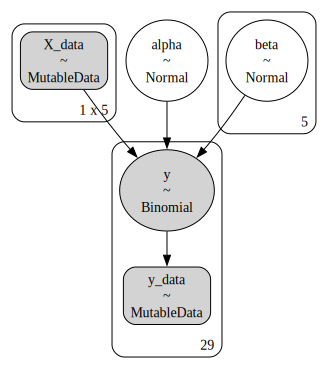

In [21]:
m.to_graphviz()

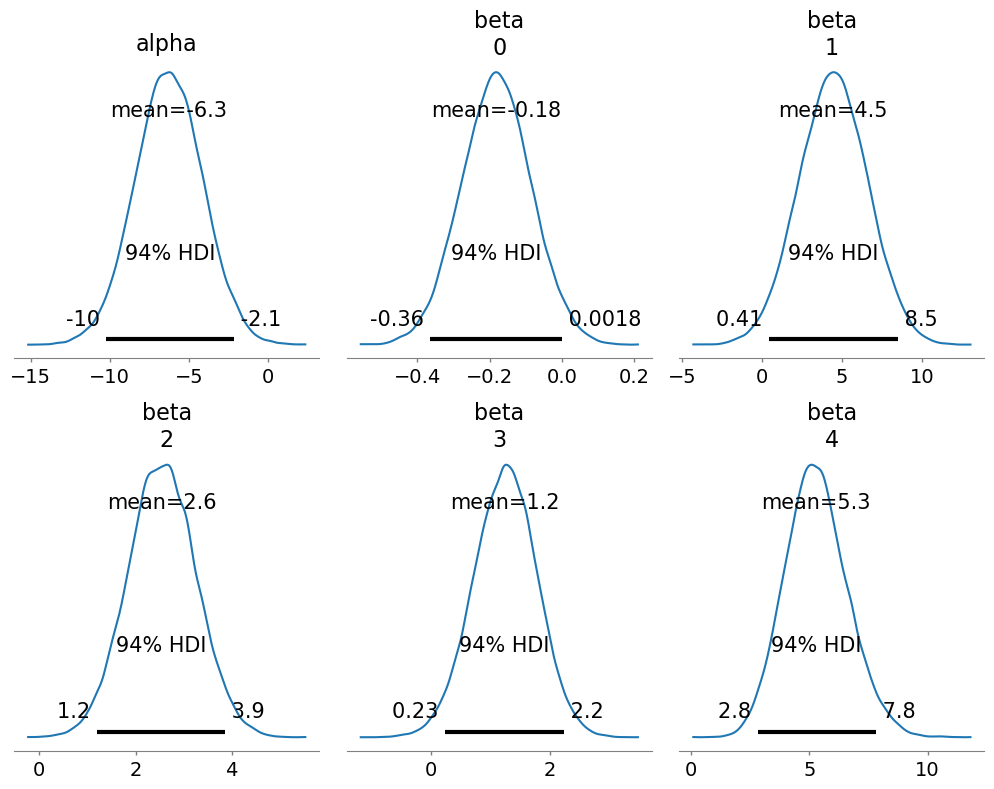

In [25]:
az.plot_posterior(trace, figsize = (10, 8))
plt.tight_layout()
plt.savefig('C:/Users/466131/Documents/Baye/PosteriorPlotProject.png')

C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:161: FutureWarning: chain_prop as a tuple will be deprecated in a future warning, use a dict instead
  warnings.warn(
C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:433: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for chain_id in range(data.dims["chain"])


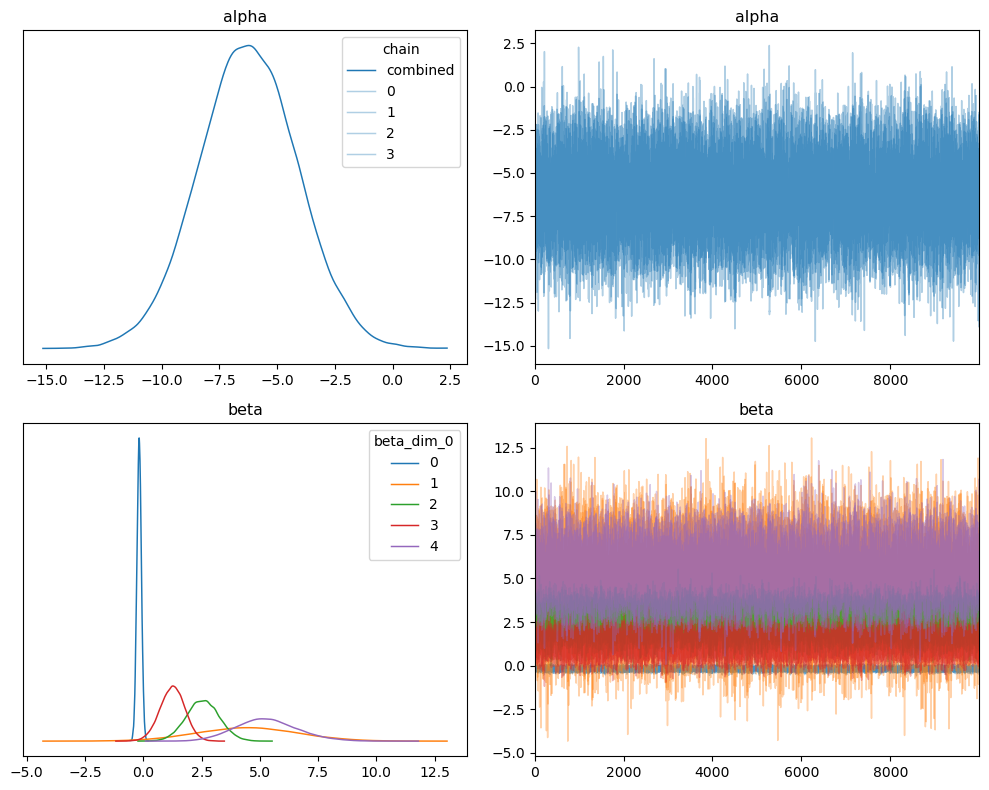

In [23]:
az.plot_trace(trace, figsize = (10, 8),compact=True, combined=True, legend=True, chain_prop=("ls", "-"))

plt.tight_layout()

plt.savefig('C:/Users/466131/Documents/Baye/TracePlotProject.png')


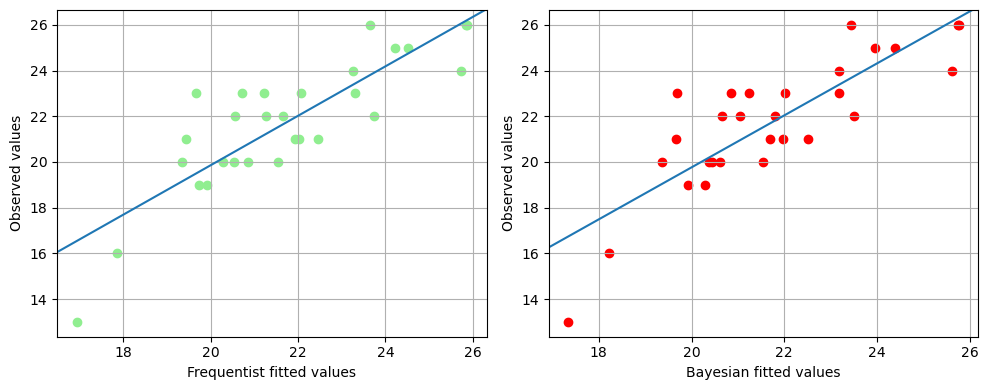

In [26]:
# posterior densities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.grid(True)
ax1.scatter(yfat,y, color="lightgreen")
line_fit = sm.OLS(y, sm.add_constant(yfat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax1)
ax1.set_xlabel("Frequentist fitted values")
ax1.set_ylabel("Observed values")
ax1.set_facecolor("white")


ax2.grid(True)
ax2.scatter(yhat,y, color="red")
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax2)
ax2.set_xlabel("Bayesian fitted values")
ax2.set_ylabel("Observed values")
ax2.set_facecolor("white")

plt.savefig('C:/Users/466131/Documents/Baye/ComparisonPlotProject.png')

plt.tight_layout()
plt.show()



In [27]:
#Nick Diaz

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [3.84,0.59,0.361,4.069,0.088]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


23.12703448275862


In [28]:
#Tony Ferguson

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [4.41,0.55,0.343,3.847,0.03]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


19.948344827586208


In [37]:
#Josh Thompson

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [2.12,0.64,0.226,3.029,0.303]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


23.187


In [32]:
#Charles Oliveira

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [3.2,0.51,0.227,3.034,0.559]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


24.25162068965517


In [33]:
#Sean Brady

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [3.55,0.61,0.176,3.486,0.398]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


24.255172413793098


In [34]:
#Arman Tsarukyan

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [3.79,0.48,0.36,2.649,0.223]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


16.460034482758626


In [35]:
#Merab

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

#Impact
X_c = [2.37,0.57,0.143,3.174,0.526]
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)
            print(r)
            

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


24.571034482758623


In [43]:
#test

os.chdir("C:/Users/466131/Documents/Baye")
data = pd.read_csv("MMAProject.csv", index_col=0)

X = data[["SA","SD","KO","SS","GI"]].to_numpy()
y = data["y"].to_numpy()

#Impact
X_c = (X[7,:]-X[2,:])
X_c = np.reshape(X_c, (-1, 1))
X_c = X_c.T

#Impact
X_c2 = (X[2,:]-X[7,:])
X_c2 = np.reshape(X_c2, (-1, 1))
X_c2 = X_c2.T

with m:        
            n=26
            pm.set_data({"X_data": X_c})
            ppki = pm.sample_posterior_predictive(trace, predictions=True)
            r = np.mean(az.summary(ppki,var_names="y")['mean'].values)/n
        
with m:
            n=26
            pm.set_data({"X_data": X_c2})
            ppki2 = pm.sample_posterior_predictive(trace, predictions=True)
            r2 = np.mean(az.summary(ppki2,var_names="y")['mean'].values)/n
            
with m:
    if r>r2:
        print("A has a " +str(r/(r+r2)*100)+ " % impact on the fight with B.")
    else:
        print("B has a " +str(r2/(r+r2)*100)+ " % impact on the fight with A.")

Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")
Sampling: [y]


C:\Users\466131\AppData\Local\anaconda3\envs\pymc_env\Lib\site-packages\arviz\stats\stats.py:1351: UserWarning: Selecting first found group: predictions
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


B has a 60.65536414182846 % impact on the fight with A.
